https://www.alexfederation.com/blog/002-oct-cnn/

https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

https://developpaper.com/google-collab-platform-training-model-case/

https://github.com/Kaggle/kaggle-api

very good :
https://towardsdatascience.com/detecting-retina-damage-from-oct-retinal-images-315b4af62938

https://towardsdatascience.com/detecting-retina-damage-from-oct-retinal-images-315b4af62938

very good:
https://medium.com/@shivam.sksinha/finding-disease-in-retinal-oct-image-49d012db1d98

https://towardsdatascience.com/https-medium-com-santoshdasa001-retinal-oct-damage-detection-5492c11763ce


In [ ]:
#Is GPU Working?
import torch
torch.cuda.is_available()

False

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#--------------1------------------
#Change Location
import os
os.chdir("/content/gdrive/My Drive")

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

Load the data

In [ ]:
#!pip install kaggle

https://github.com/Kaggle/kaggle-api

To use the Kaggle API, sign up for a Kaggle account at https://www.kaggle.com. Then go to the 'Account' tab of your user profile (https://www.kaggle.com/<username>/account) and select 'Create API Token'. This will trigger the download of kaggle.json, a file containing your API credentials. Place this file in the location ~/.kaggle/kaggle.json (on Windows in the location C:\Users\<Windows-username>\.kaggle\kaggle.json - you can check the exact location, sans drive, with echo %HOMEPATH%). You can define a shell environment variable KAGGLE_CONFIG_DIR to change this location to $KAGGLE_CONFIG_DIR/kaggle.json (on Windows it will be %KAGGLE_CONFIG_DIR%\kaggle.json).

For your security, ensure that other users of your computer do not have read access to your credentials. On Unix-based systems you can do this with the following command:

chmod 600 ~/.kaggle/kaggle.json

You can also choose to export your Kaggle username and token to the environment:

export KAGGLE_USERNAME=datadinosaur
export KAGGLE_KEY=xxxxxxxxxxxxxx

{"username":"yoavsagi","key":"578895bd773c69f9955f88e40e5853bd"}

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "yoavsagi" # username from the json file
os.environ['KAGGLE_KEY'] = "578895bd773c69f9955f88e40e5853bd" # key from the json file

Kaggle data download:
Establish kaggle Account 
and download kaggle.json Papers. 
After creating an account,
select “create new API token” in “my account” – “API”, and then download it kaggle.json Papers.

To create a kaggle folder

In [ ]:
#!mkdir -p ~/.kaggle
#!mkdir kaggle

In [ ]:
basepath = Path('kaggle_kermany2018/OCT2017 /'); basepath

PosixPath('kaggle_kermany2018/OCT2017 ')

Copy the kaggle.json folder to the specified folder:

Test success:

In [ ]:
!kaggle competitions list

ref                                            deadline             category             reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started   Knowledge       2325           False  
titanic                                        2030-01-01 00:00:00  Getting Started   Knowledge      15876           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started   Knowledge       5195           False  
connectx                                       2030-01-01 00:00:00  Getting Started   Knowledge        321           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research          Knowledge         62           False  
competitive-data-science-predict-future-sales  2020-12-31 23:59:00  Playground            Kudos       5538           False  


length of normal images =  26315

length of images with disease drusen =  8616

length of images with disease cnv =  37205

length of images with disease dme =  11348

In [ ]:
!ls 'kaggle_kermany2018/OCT2017 /train'

CNV  DME  DRUSEN  NORMAL


In [ ]:
import os
def countNumberOfFiles(path):
    files = []
    for r, d, f in os.walk(path):
        for file in f:
             files.append(os.path.join(r, file))
    return len(files)

In [ ]:
#import os
#os.system("rm -rf 'kaggle_kermany2018/OCT2017 /train/DME (1)'")

0

In [ ]:
normal_len = len(os.listdir("kaggle_kermany2018/OCT2017 /train/NORMAL"))

In [ ]:
drusen_len = len(os.listdir("kaggle_kermany2018/OCT2017 /train/DRUSEN"))

In [ ]:
dme_len = len(os.listdir("kaggle_kermany2018/OCT2017 /train/DME"))

In [ ]:
cnv_len = len(os.listdir("kaggle_kermany2018/OCT2017 /train/CNV"))

In [ ]:
print("length of normal images = ",normal_len)
print("length of images with disease drusen = ",drusen_len)
print("length of images with disease cnv = ",cnv_len)
print("length of images with disease dme = ",dme_len)

length of normal images =  10289
length of images with disease drusen =  8616
length of images with disease cnv =  37405
length of images with disease dme =  11348


In [ ]:
print('train NORMAL #:',countNumberOfFiles('kaggle_kermany2018/OCT2017 /train/NORMAL'))
print('train DME #:',countNumberOfFiles('kaggle_kermany2018/OCT2017 /train/DME'))
print('train CNV #:',countNumberOfFiles('kaggle_kermany2018/OCT2017 /train/CNV'))
print('train DRUSEN #:',countNumberOfFiles('kaggle_kermany2018/OCT2017 /train/DRUSEN'))

train NORMAL #: 10289
train DME #: 11348
train CNV #: 0
train DRUSEN #: 8616


In [ ]:
print('test NORMAL #:',countNumberOfFiles('kaggle_kermany2018/OCT2017 /test/NORMAL'))
print('test DME #:',countNumberOfFiles('kaggle_kermany2018/OCT2017 /test/DME'))
print('test CNV #:',countNumberOfFiles('kaggle_kermany2018/OCT2017 /test/CNV'))
print('test DRUSEN #:',countNumberOfFiles('kaggle_kermany2018/OCT2017 /test/DRUSEN'))

test NORMAL #: 242
test DME #: 242
test CNV #: 242
test DRUSEN #: 242


To download a dataset:

In [ ]:
#!rm  "kermany2018.zip"

In [ ]:
!kaggle datasets download -d paultimothymooney/kermany2018
!unzip -n  "kermany2018.zip"  -x '/train/NORMAL/\*' -x '/train/DME/\*' -x '/train/DRUSEN /\*' -x 'test/\*' -d kaggle_kermany2018

100% 10.8G/10.8G [04:29<00:00, 31.0MB/s]
100% 10.8G/10.8G [04:29<00:00, 43.2MB/s]
Archive:  kermany2018.zip
  inflating: kaggle_kermany2018/OCT2017 /train/NORMAL/NORMAL-1849029-4.jpeg  
  inflating: kaggle_kermany2018/OCT2017 /train/NORMAL/NORMAL-1849029-40.jpeg  
  inflating: kaggle_kermany2018/OCT2017 /train/NORMAL/NORMAL-1849029-41.jpeg  
  inflating: kaggle_kermany2018/OCT2017 /train/NORMAL/NORMAL-1849029-42.jpeg  
  inflating: kaggle_kermany2018/OCT2017 /train/NORMAL/NORMAL-1849029-43.jpeg  
  inflating: kaggle_kermany2018/OCT2017 /train/NORMAL/NORMAL-1849029-44.jpeg  
  inflating: kaggle_kermany2018/OCT2017 /train/NORMAL/NORMAL-1849029-45.jpeg  
  inflating: kaggle_kermany2018/OCT2017 /train/NORMAL/NORMAL-1849029-46.jpeg  
  inflating: kaggle_kermany2018/OCT2017 /train/NORMAL/NORMAL-1849029-5.jpeg  
  inflating: kaggle_kermany2018/OCT2017 /train/NORMAL/NORMAL-1849029-6.jpeg  
  inflating: kaggle_kermany2018/OCT2017 /train/NORMAL/NORMAL-1849029-7.jpeg  
  inflating: kaggle_kermany

In [ ]:
!ls kaggle_kermany2018/'OCT2017 '/   

test  train


In [ ]:
!ls

'Colab Notebooks'   Dataset6_splited_ds6_runResults.xlsx   kaggle
 DataSet6	    download				   kaggle_kermany2018


In [ ]:
!ls kaggle_kermany2018/'OCT2017 '/test 

CNV  DME  DRUSEN  NORMAL


Extract the file to Google cloud disk:

Unzip file:

https://manpages.ubuntu.com/manpages/xenial/en/man1/unzip.1.html

In [ ]:
!unzip -n  "kermany2018.zip" -d kaggle_kermany2018

unzip:  cannot find or open kermany2018.zip, kermany2018.zip.zip or kermany2018.zip.ZIP.


In [ ]:
print('train #:',countNumberOfFiles('kaggle_kermany2018/OCT2017 /train'))
#print('val #:',countNumberOfFiles('kaggle_kermany2018/OCT2017 /val'))
print('test #:',countNumberOfFiles('kaggle_kermany2018/OCT2017 /test'))

train #: 9593
test #: 968


Pre-process the data

In [ ]:
src = (ImageList.from_folder(basepath)
       .split_by_folder(train='train', valid='test')
       .label_from_folder())
tfms = get_transforms()
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
CNV
  if getattr(ds, 'warn', False): warn(ds.warn)


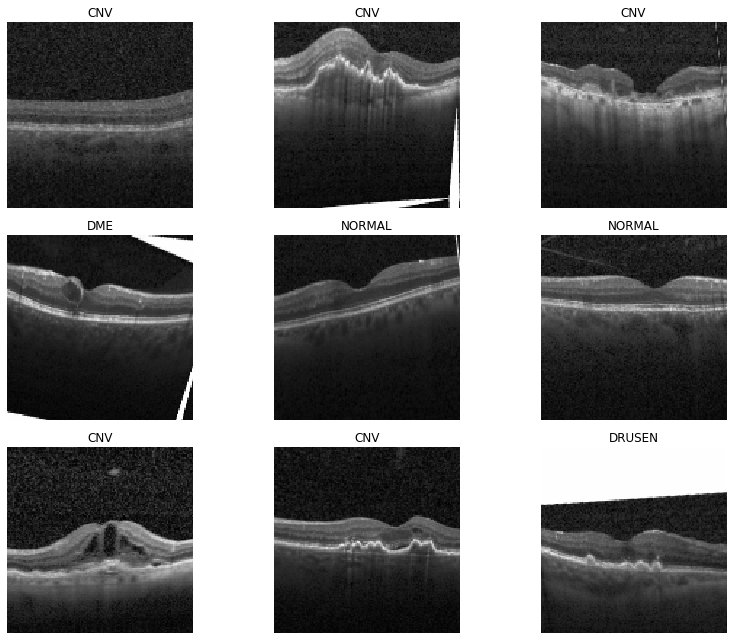

In [ ]:
data.show_batch(rows=3, figsize=(12,9))

Train the model

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate])
learn.fit_one_cycle(4)
learn.save('oct_resnet34')

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:08<00:00, 10.0MB/s]


In [ ]:
learn.recorder.plot_metrics() 

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


NameError: ignored

In [ ]:
losses,idxs = interp.top_losses()

In [ ]:
learn.recorder.plot_losses()

resnet50

In [ ]:
src = (ImageList.from_folder(basepath)
       .split_by_folder(train='train', valid='test')
       .label_from_folder())
tfms = get_transforms()
data = (src.transform(tfms, size=256)
        .databunch(bs=32).normalize(imagenet_stats))
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, error_rate])

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
CNV
  if getattr(ds, 'warn', False): warn(ds.warn)
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 106MB/s]


In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr = 0.001
learn.fit_one_cycle(4, slice(lr))
learn.save('oct_rn50-1')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(5e-6, lr/5))

In [ ]:
learn.save('oct_rn50-2')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
learn.recorder.plot_metrics() 

In [ ]:
learn.recorder.plot_losses()